In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna (x) else x)

In [42]:
df_DA_US = df[(df['job_title']== 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [43]:
df_job_skills = df_DA_US.explode('job_skills')
df_DA_US['job_posted_month_nos'] = df_DA_US['job_posted_date'].dt.month

In [44]:
df_DA_US_pivot = df_job_skills.pivot_table(index='job_posted_month_nos', columns= 'job_skills', aggfunc='size', fill_value=0)
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,c,c#,c++,cassandra,chainer,chef,clickup,clojure,cobol,cognos,colocation,confluence,couchbase,crystal,css,dart,databricks,datarobot,dax,db2,delphi,digitalocean,django,...,spring,spss,sql,sql server,sqlite,sqlserver,ssis,ssrs,svelte,svn,swift,symphony,t-sql,tableau,tensorflow,terminal,terraform,theano,tidyr,tidyverse,trello,typescript,ubuntu,unify,unity,unix,vb.net,vba,visio,visual basic,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_nos,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,1,0,97,92,7,19,2,30,21,19,2,0,1,0,0,5,30,1,27,2,12,8,0,31,0,36,28,0,0,1,...,2,90,1138,130,0,0,29,30,0,0,1,0,15,646,7,6,1,0,0,1,1,0,0,0,3,33,0,65,33,10,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,2,0,90,58,3,15,1,18,26,11,0,0,0,0,0,3,21,0,5,0,21,6,0,8,0,20,20,0,0,0,...,1,46,782,99,1,0,33,51,0,0,5,0,12,408,0,3,1,0,0,1,2,0,0,0,1,11,1,42,23,16,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,3,0,77,52,6,8,0,17,13,5,3,0,0,3,0,1,27,0,14,0,20,15,0,12,0,24,16,0,0,0,...,3,71,802,95,1,0,27,33,0,0,2,0,28,463,1,6,1,0,0,1,0,0,0,1,1,27,2,44,36,21,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,0,2,107,57,7,11,5,24,16,29,1,0,2,0,0,3,19,0,17,0,15,3,0,23,0,14,16,0,0,0,...,8,46,845,117,1,0,28,43,0,0,1,0,20,462,1,2,0,0,0,1,1,1,0,3,0,13,1,47,43,14,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,1,1,49,60,1,6,3,20,19,12,2,0,0,0,0,2,21,0,11,0,23,4,0,19,0,20,13,4,2,0,...,1,37,706,89,2,0,24,24,0,0,1,0,16,367,1,7,1,0,0,0,1,0,2,4,0,5,0,25,39,9,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,1,0,60,41,7,15,4,14,24,18,4,0,1,0,0,2,26,0,10,0,18,8,3,25,0,24,7,0,0,0,...,6,53,742,64,1,0,17,18,0,0,0,0,3,395,1,3,1,0,0,1,0,0,0,2,0,20,1,55,22,5,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,5,4,53,28,3,7,6,13,9,11,3,0,1,0,0,2,14,0,15,0,8,2,1,10,0,12,9,1,0,2,...,2,49,560,69,0,1,19,20,0,1,0,0,5,296,1,7,2,0,0,1,0,0,0,0,1,6,4,27,20,14,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,5,5,66,50,4,18,7,25,12,19,1,0,2,0,1,0,29,0,14,0,15,5,1,22,1,15,9,0,0,4,...,11,70,784,90,0,0,19,29,0,0,0,0,14,480,0,4,0,0,0,1,0,0,0,0,2,10,0,52,23,15,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,2,3,48,38,0,6,0,19,3,10,1,0,0,0,0,1,7,0,4,0,10,5,0,13,2,9,15,0,0,1,...,1,45,485,70,1,0,21,17,0,0,0,1,15,277,2,3,0,0,0,0,0,0,0,2,0,10,1,20,9,9,2,0,0,0,11,0,65,0,0,2


In [45]:
df_DA_US_pivot.loc['total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('total')
df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,sql server,aws,go,flow,snowflake,spss,azure,sap,sharepoint,javascript,looker,vba,outlook,jira,alteryx,java,hadoop,qlik,ssrs,spreadsheet,visio,mysql,ssis,sheets,spark,c,databricks,cognos,redshift,dax,...,arch,node,redis,puppet,datarobot,solidity,workfront,dplyr,clickup,svn,couchbase,ubuntu,powerbi,ruby on rails,watson,digitalocean,typescript,opencv,mxnet,graphql,mariadb,nltk,apl,nuix,hugging face,yarn,colocation,fortran,ringcentral,clojure,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_nos,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,130,97,111,112,81,90,92,46,49,66,76,65,53,72,53,44,49,48,30,47,33,28,29,42,27,30,31,30,31,36,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,99,90,63,92,63,46,58,48,52,46,58,42,38,30,34,36,26,49,51,22,23,30,33,21,13,18,8,21,25,20,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,95,77,60,67,56,71,52,49,56,46,44,44,40,38,41,33,26,37,33,27,36,29,27,15,23,17,12,27,18,24,...,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,117,107,75,77,92,46,57,67,42,42,54,47,33,47,57,56,47,30,43,16,43,38,28,19,22,24,23,19,26,14,...,0,0,0,2,0,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,89,49,68,50,49,37,60,82,35,30,43,25,25,22,35,25,38,28,24,31,39,27,24,21,13,20,19,21,16,20,...,0,0,2,0,0,1,0,0,0,0,0,2,1,2,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,64,60,72,39,63,53,41,73,44,46,36,55,37,35,33,32,27,21,18,34,22,24,17,20,23,14,25,26,17,24,...,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,69,53,53,39,48,49,28,39,32,52,37,27,34,26,33,24,15,13,20,11,20,17,19,17,19,13,10,14,12,12,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,90,66,70,69,62,70,50,66,63,63,44,52,48,41,29,30,24,31,29,17,23,24,19,33,20,25,22,29,19,15,...,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,70,48,38,37,50,45,38,40,32,36,26,20,27,24,19,20,16,13,17,11,9,20,21,8,10,19,13,7,11,9,...,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


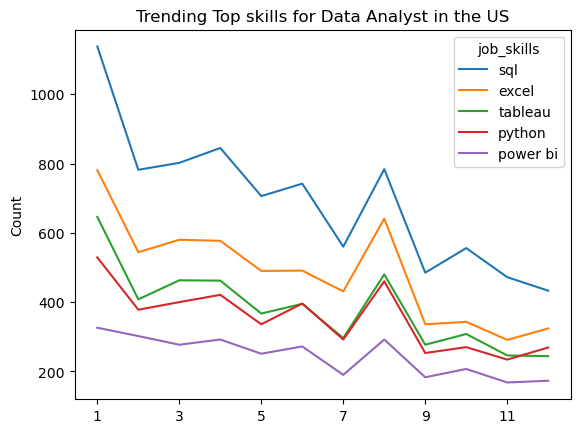

In [46]:
df_DA_US_pivot.iloc[:,:5].plot(kind='line')

plt.title('Trending Top skills for Data Analyst in the US')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [47]:
df_total = df_DA_US.groupby('job_posted_month_nos').size()
df_total

job_posted_month_nos
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [63]:
df_DA_US_percent = df_DA_US_pivot.iloc[:12].div(df_total/100, axis=0)

df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_nos'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns ='job_posted_month_nos')
df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,sql server,aws,go,flow,snowflake,spss,azure,sap,sharepoint,javascript,looker,vba,outlook,jira,alteryx,java,hadoop,qlik,ssrs,spreadsheet,visio,mysql,ssis,sheets,spark,c,databricks,cognos,redshift,dax,...,arch,node,redis,puppet,datarobot,solidity,workfront,dplyr,clickup,svn,couchbase,ubuntu,powerbi,ruby on rails,watson,digitalocean,typescript,opencv,mxnet,graphql,mariadb,nltk,apl,nuix,hugging face,yarn,colocation,fortran,ringcentral,clojure,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,7.158590,5.341410,6.112335,6.167401,4.460352,4.955947,5.066079,2.533040,2.698238,3.634361,4.185022,3.579295,2.918502,3.964758,2.918502,2.422907,2.698238,2.643172,1.651982,2.588106,1.817181,1.541850,1.596916,2.312775,1.486784,1.651982,1.707048,1.651982,1.707048,1.982379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110132,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055066,0.000000,0.000000,0.000000,0.000000,0.055066,0.000000,0.055066,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,7.710280,7.009346,4.906542,7.165109,4.906542,3.582555,4.517134,3.738318,4.049844,3.582555,4.517134,3.271028,2.959502,2.336449,2.647975,2.803738,2.024922,3.816199,3.971963,1.713396,1.791277,2.336449,2.570093,1.635514,1.012461,1.401869,0.623053,1.635514,1.947040,1.557632,...,0.000000,0.077882,0.077882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.077882,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,6.975037,5.653451,4.405286,4.919236,4.111601,5.212922,3.817915,3.597651,4.111601,3.377386,3.230543,3.230543,2.936858,2.790015,3.010279,2.422907,1.908957,2.716593,2.422907,1.982379,2.643172,2.129222,1.982379,1.101322,1.688693,1.248164,0.881057,1.982379,1.321586,1.762115,...,0.000000,0.073421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220264,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,8.546384,7.815924,5.478451,5.624543,6.720234,3.360117,4.163623,4.894083,3.067933,3.067933,3.944485,3.433163,2.410519,3.433163,4.163623,4.090577,3.433163,2.191381,3.140979,1.168736,3.140979,2.775749,2.045289,1.387874,1.607012,1.753104,1.680058,1.387874,1.899196,1.022644,...,0.000000,0.000000,0.000000,0.146092,0.000000,0.146092,0.073046,0.073046,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.073046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,7.698962,4.238754,5.882353,4.325260,4.238754,3.200692,5.190311,7.093426,3.027682,2.595156,3.719723,2.162630,2.162630,1.903114,3.027682,2.162630,3.287197,2.422145,2.076125,2.681661,3.373702,2.335640,2.076125,1.816609,1.124567,1.730104,1.643599,1.816609,1.384083,1.730104,...,0.000000,0.

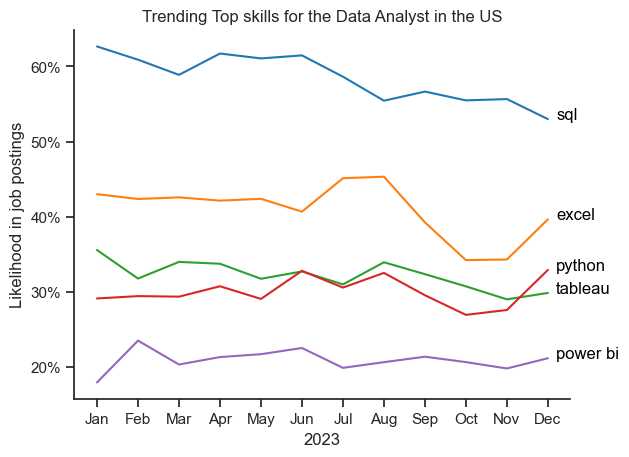

In [78]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes = False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
plt.legend().remove()

plt.title('Trending Top skills for the Data Analyst in the US')
plt.xlabel('2023')
plt.ylabel('Likelihood in job postings')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1,i], df_plot.columns[i], color='black')

plt.show()